In [ ]:
# libraries
from pandas.plotting import parallel_coordinates
import plotly.express as px
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme()
sns.set_style('whitegrid')

In [ ]:
df_aluno_tic_ba = pd.read_csv('dataset/alunos_curso_2015_2019_tic_BA.csv')
df_aluno_tic_ba.head()

,NU_ANO_CENSO,CO_IES,TP_CATEGORIA_ADMINISTRATIVA,TP_ORGANIZACAO_ACADEMICA,CO_CURSO,CO_CURSO_POLO,TP_TURNO,TP_GRAU_ACADEMICO,TP_MODALIDADE_ENSINO,TP_NIVEL_ACADEMICO,...,CO_PAIS_DESTINO,IN_MATRICULA,IN_CONCLUINTE,IN_INGRESSO_TOTAL,IN_INGRESSO_VAGA_NOVA,IN_INGRESSO_PROCESSO_SELETIVO,NU_ANO_INGRESSO,CO_UF,NO_CURSO,SG_IES
0,2015,578,1.0,1.0,13277.0,NaN,4.0,1.0,1.0,1.0,...,NaN,1.0,0.0,0.0,0.0,NaN,2013.0,29,CIÊNCIA DA COMPUTAÇÃO,UFBA
1,2015,578,1.0,1.0,13277.0,NaN,4.0,1.0,1.0,1.0,...,NaN,1.0,0.0,0.0,0.0,NaN,2013.0,29,CIÊNCIA DA COMPUTAÇÃO,UFBA
2,2015,578,1.0,1.0,13277.0,NaN,4.0,1.0,1.0,1.0,...,NaN,1.0,0.0,0.0,0.0,NaN,2013.0,29,CIÊNCIA DA COMPUTAÇÃO,UFBA
3,2015,578,1.0,1.0,13277.0,NaN,4.0,1.0,1.0,1.0,...,NaN,1.0,0.0,0.0,0.0,NaN,2013.0,29,CIÊNCIA DA COMPUTAÇÃO,UFBA
4,2015,578,1.0,1.0,13277.0,NaN,4.0,1.0,1.0,1.0,...,NaN,1.0,0.0,0.0,0.0,NaN,2013.0,29,CIÊNCIA DA COMPUTAÇÃO,UFBA


In [ ]:
df_aluno_tic_br = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/DATASET Diversidade/alunos_curso_2015_2019_tic_br.csv', usecols=['NU_ANO_CENSO', 'CO_IES', 'CO_CURSO',
                            'ID_ALUNO', 'CO_ALUNO_CURSO', 'TP_COR_RACA', 'TP_SEXO', 'NU_IDADE', 'TP_NACIONALIDADE', 'TP_CATEGORIA_ADMINISTRATIVA', 'TP_MODALIDADE_ENSINO', 'IN_DEFICIENCIA'])
df_aluno_tic_br.head()

<ipython-input-5-547ef95eec4f>:1: DtypeWarning: Columns (11) have mixed types. Specify dtype option on import or set low_memory=False.
  df_aluno_tic_br = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/DATASET Diversidade/alunos_curso_2015_2019_tic_br.csv', usecols=['NU_ANO_CENSO', 'CO_IES', 'CO_CURSO',


,NU_ANO_CENSO,CO_IES,TP_CATEGORIA_ADMINISTRATIVA,CO_CURSO,TP_MODALIDADE_ENSINO,ID_ALUNO,CO_ALUNO_CURSO,TP_COR_RACA,TP_SEXO,NU_IDADE,TP_NACIONALIDADE,IN_DEFICIENCIA
0,2015,572,1.0,82799.0,1.0,715BC896D18A54A0BFBB7CBB235A558A,11339915.0,1.0,2.0,27.0,1.0,0.0
1,2015,572,1.0,82799.0,1.0,DC7326D1F6301D276973CC54139F5AE0,11339587.0,0.0,2.0,28.0,1.0,0.0
2,2015,572,1.0,82799.0,1.0,F33700A28A68F7E4F6BDBB36748465F9,11340065.0,1.0,2.0,26.0,1.0,0.0
3,2015,572,1.0,82799.0,1.0,540EE6706CC1E11075ED4C9141A3AAA1,11339771.0,1.0,2.0,25.0,1.0,0.0
4,2015,572,1.0,82799.0,1.0,8E2A15CF9E5D0F03B5EFD44C88A56496,11339068.0,1.0,2.0,24.0,1.0,0.0


In [ ]:
df_aluno_tic_ba.drop_duplicates(['CO_IES','SG_IES'])[['CO_IES','SG_IES']]

,CO_IES,SG_IES
0,578,UFBA
874,24,UESC
1072,599,IFBA
1897,666,UEFS
2275,688,UESB
2492,3984,UNIVASF
2714,14509,IFBAIANO
2922,4503,UFRB
2927,40,UNEB


In [ ]:
replace_categoria = {
    'TP_COR_RACA':{
        0: 'Não quis declarar',
        1: 'Branca',
        2: 'Preta',
        3: 'Parda',
        4: 'Amarela',
        5: 'Indígena',
        9: 'Sem informação'
    },
    'TP_SEXO':{
        1:'Feminino',
        2:'Masculino'
    }
}

In [ ]:
df_aluno_tic_ba.shape

(18414, 108)

In [ ]:
df_aluno_tic_ba.loc[(df_aluno_tic_ba['TP_COR_RACA'] == 1) & (df_aluno_tic_ba['NU_ANO_CENSO'] == 2015)]['TP_COR_RACA'].count()

3190

In [ ]:
def get_vetor_categorias_r(data, column, categoria, percentagem = True, crescimento_percentual = False):
    new_group = []
    crescimentoPercentual = []
    somatorio = []
    result = []
    # data = data.loc[(data[column] == categoria)]
    for i in range(2015, 2020):
        somatorio.append(data.loc[data.NU_ANO_CENSO == i][column].value_counts().sum())
        x = data.loc[(data[column] == categoria) & (data['NU_ANO_CENSO'] == i)][column].value_counts().values

        x_primeiro_ano = data.loc[(data[column] == categoria) & (data['NU_ANO_CENSO'] == 2015)][column].count()
        if i == 2015:
            crescimentoPercentual.append(0)
        else:
            crescimentoPercentual.append((x[0]/x_primeiro_ano)*100)

        if len(x) == 0:
            new_group.append(0)
        else:
            new_group.append(x[0])

        print(x, column, categoria)

    for i in range(0, len(new_group)):
        result.append((new_group[i]/somatorio[i])*100)
        print(result[i], new_group[i], somatorio[i])


    if percentagem:
        print(result)
        return result

    if crescimento_percentual:
        print(crescimentoPercentual)
        return crescimentoPercentual

    return new_group

def get_vetor_line_chart(data_ba:pd.DataFrame, data_brasil:pd.DataFrame, column_name, values, percentagem = True, crescimento_percentual = False):
    df_brasil = data_brasil.loc[(data_brasil.NU_ANO_CENSO >= 2015) &
                (data_brasil.TP_CATEGORIA_ADMINISTRATIVA.isin([1, 2, 3])) &
                (data_brasil.TP_MODALIDADE_ENSINO == 1)
                ]
    dict_categoria_ba = {}
    dict_categoria_br = {}
    dict_categoria_ba['Anos'] = [x for x in range(2015, 2020)]
    dict_categoria_br['Anos'] = [x for x in range(2015, 2020)]

    for categoria in values:
        dict_categoria_ba[categoria] = get_vetor_categorias_r(data_ba.replace(replace_categoria), column_name, categoria, percentagem, crescimento_percentual)
        # print(dict_categoria_ba[categoria] )
        dict_categoria_br[categoria] = get_vetor_categorias_r(df_brasil.replace(replace_categoria), column_name, categoria, percentagem, crescimento_percentual)

    dict_categoria_ba['Total'] = [0 for x in range(2015, 2020)]
    dict_categoria_br['Total'] = [0 for x in range(2015, 2020)]

    print()
    # print(dict_categoria_ba, dict_categoria_br)
    plot_def_ba_cor_raca = pd.DataFrame(dict_categoria_ba)
    plot_def_br_cor_raca = pd.DataFrame(dict_categoria_br)

    for categoria in values:
        plot_def_ba_cor_raca['Total'] = plot_def_ba_cor_raca['Total'] + plot_def_ba_cor_raca[categoria]
        plot_def_br_cor_raca['Total'] = plot_def_br_cor_raca['Total'] + plot_def_br_cor_raca[categoria]

    print('cor e raça na BA')
    display(plot_def_ba_cor_raca)
    print('cor e raça no brasil')
    display(plot_def_br_cor_raca)
    return plot_def_br_cor_raca, plot_def_ba_cor_raca

In [ ]:
df_aluno_tic_ba[['ID_ALUNO', 'TP_COR_RACA', 'TP_SEXO']].groupby(['TP_SEXO', 'TP_COR_RACA']).count().replace(replace_categoria)

ID_ALUNO
TP_SEXO TP_COR_RACA          
1.0     0.0              1337
        1.0               249
        2.0               567
        3.0              1027
        4.0                27
        5.0                12
        9.0                20
2.0     0.0              7062
        1.0              1366
        2.0              2087
        3.0              4491
        4.0                80
        5.0                54
        9.0                35

In [ ]:
df_aluno_tic_br[['NU_ANO_CENSO', 'TP_COR_RACA', 'ID_ALUNO']].groupby(['NU_ANO_CENSO', 'TP_COR_RACA']).count()

ID_ALUNO
NU_ANO_CENSO TP_COR_RACA          
2015         0.0            166036
             1.0            185656
             2.0             27393
             3.0             99625
             4.0              7926
             5.0              1841
             9.0             18969
2016         0.0            142824
             1.0            202131
             2.0             30749
             3.0            111315
             4.0              8343
             5.0              2595
             9.0              8090
2017         0.0            117532
             1.0            211444
             2.0             31961
             3.0            121127
             4.0              8544
             5.0              3105
             9.0              3414
2018         0.0            102520
             1.0            231528
             2.0             35144
             3.0            135858
             4.0              8722
             5.0              2992
             9.0              1486
2019         0.0             95751
             1.0            254055
             2.0             36838
             3.0            153029
             4.0              8985
             5.0              2829
             9.0               810

[1991] TP_COR_RACA Não quis declarar
[2032] TP_COR_RACA Não quis declarar
[1705] TP_COR_RACA Não quis declarar
[1397] TP_COR_RACA Não quis declarar
[1274] TP_COR_RACA Não quis declarar
62.41379310344828 1991 3190
57.69449176604202 2032 3522
46.776406035665296 1705 3645
36.19170984455958 1397 3860
30.3550154872528 1274 4197
[31818] TP_COR_RACA Não quis declarar
[26743] TP_COR_RACA Não quis declarar
[21292] TP_COR_RACA Não quis declarar
[18915] TP_COR_RACA Não quis declarar
[17101] TP_COR_RACA Não quis declarar
23.820682323523467 31818 133573
19.179546025029584 26743 139435
14.434569206885097 21292 147507
12.330990781908028 18915 153394
10.679781420765028 17101 160125
[178] TP_COR_RACA Branca
[212] TP_COR_RACA Branca
[300] TP_COR_RACA Branca
[382] TP_COR_RACA Branca
[543] TP_COR_RACA Branca
5.579937304075235 178 3190
6.019307211811471 212 3522
8.23045267489712 300 3645
9.896373056994818 382 3860
12.937812723373836 543 4197
[54565] TP_COR_RACA Branca
[60943] TP_COR_RACA Branca
[68196] TP_

,Anos,Não quis declarar,Branca,Preta,Parda,Amarela,Indígena,Total
0,2015,1991,178,294,678,16,7,3164
1,2016,2032,212,393,833,17,18,3505
2,2017,1705,300,536,1060,23,13,3637
3,2018,1397,382,646,1396,22,13,3856
4,2019,1274,543,785,1551,29,15,4197


cor e raça no brasil


,Anos,Não quis declarar,Branca,Preta,Parda,Amarela,Indígena,Total
0,2015,31818,54565,8773,30272,2511,407,128346
1,2016,26743,60943,10242,35761,2614,533,136836
2,2017,21292,68196,11671,41130,2843,656,145788
3,2018,18915,71885,12733,45298,2920,690,152441
4,2019,17101,75227,12137,51190,3174,666,159495


NameError: ignored

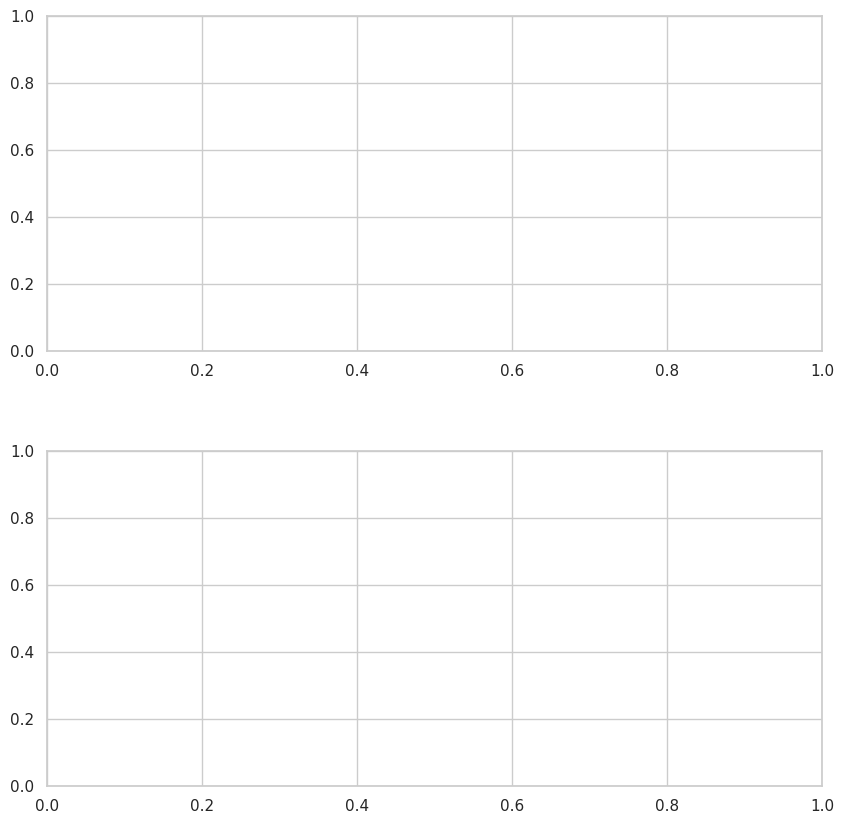

In [ ]:
plot_def_br_cor_raca, plot_def_ba_cor_raca = get_vetor_line_chart(df_aluno_tic_ba, df_aluno_tic_br, 'TP_COR_RACA',
            ['Não quis declarar', 'Branca','Preta','Parda','Amarela','Indígena'], False, False)
# plot_def_br_cor_raca, plot_def_ba_cor_raca = get_vetor_line_chart(clsc_presencial, df, 'TP_COR_RACA',
#             ['Didn\'t want to declare', 'White','Black','Brown','Yellow','Indigenous','No information'],True)
#Plots
f, axes = plt.subplots(2, figsize=(10, 10))
f.subplots_adjust(hspace=.3, wspace=.25)
# y_ticks = [x for x in range(0, 65, 5)]
# y_ticks = [x for x in range(10, 35, 2)]
y_ticks = [x for x in range(0, 350, 25)]
x_ticks = [2015, 2016, 2017, 2018, 2019]
plot_def_br_cor_raca.plot.line(x='Anos', xticks=x_ticks, yticks=y_ticks,ylabel='%',
#    title='Crescimento de estudantes de IES públicas por cor e raça no Brasil',
    # title='Growth of students from public higher education institutions by color and race in Brazil',
    ax=axes[0])
#axes[1].legend(labels=['White','Yellow','Brown','Black','Didn\'t declare','Indigenous'])
axes[1].legend(labels=['Não quis declarar', 'Branca','Preta','Parda','Amarela','Indígena'])
axes[0].set_xlabel('Ano')

plot_def_ba_cor_raca.plot.line(x='Anos', ax=axes[1], xticks=x_ticks, yticks=y_ticks,ylabel='%',
    #title='Crescimento de estudantes de IES públicas por cor e raça na Bahia'
    # title='Growth of students from public higher education institutions by color and race in Bahia'
    )
#axes[1].legend(labels=['White','Yellow','Brown','Black','Didn\'t declare','Indigenous'])
axes[1].legend(labels=['Não quis declarar', 'Branca','Preta','Parda','Amarela','Indígena'])
axes[1].set_xlabel('Ano')

[1595] TP_COR_RACA Não quis declarar
[1638] TP_COR_RACA Não quis declarar
[1355] TP_COR_RACA Não quis declarar
[1143] TP_COR_RACA Não quis declarar
[1066] TP_COR_RACA Não quis declarar
[27260] TP_COR_RACA Não quis declarar
[22636] TP_COR_RACA Não quis declarar
[18143] TP_COR_RACA Não quis declarar
[15982] TP_COR_RACA Não quis declarar
[14796] TP_COR_RACA Não quis declarar
[131] TP_COR_RACA Branca
[165] TP_COR_RACA Branca
[239] TP_COR_RACA Branca
[306] TP_COR_RACA Branca
[423] TP_COR_RACA Branca
[48628] TP_COR_RACA Branca
[54381] TP_COR_RACA Branca
[60432] TP_COR_RACA Branca
[63684] TP_COR_RACA Branca
[66583] TP_COR_RACA Branca
[188] TP_COR_RACA Preta
[264] TP_COR_RACA Preta
[366] TP_COR_RACA Preta
[473] TP_COR_RACA Preta
[562] TP_COR_RACA Preta
[7349] TP_COR_RACA Preta
[8658] TP_COR_RACA Preta
[9911] TP_COR_RACA Preta
[10892] TP_COR_RACA Preta
[10482] TP_COR_RACA Preta
[479] TP_COR_RACA Parda
[614] TP_COR_RACA Parda
[766] TP_COR_RACA Parda
[956] TP_COR_RACA Parda
[1147] TP_COR_RACA Par

,Não quis declarar,Branca,Preta,Parda,Amarela,Indígena,Não Informado,Anos
0,1595,131,188,479,10,5,0,2015
1,1638,165,264,614,12,11,0,2016
2,1355,239,366,766,16,9,0,2017
3,1143,306,473,956,16,9,0,2018
4,1066,423,562,1147,18,10,0,2019


cor e raça no brasil


,Não quis declarar,Branca,Preta,Parda,Amarela,Indígena,Não Informado,Anos
0,27260,48628,7349,25657,2150,334,0,2015
1,22636,54381,8658,30181,2243,437,0,2016
2,18143,60432,9911,34806,2419,567,0,2017
3,15982,63684,10892,38207,2474,592,0,2018
4,14796,66583,10482,42884,2641,558,0,2019


<Axes: xlabel='Anos'>

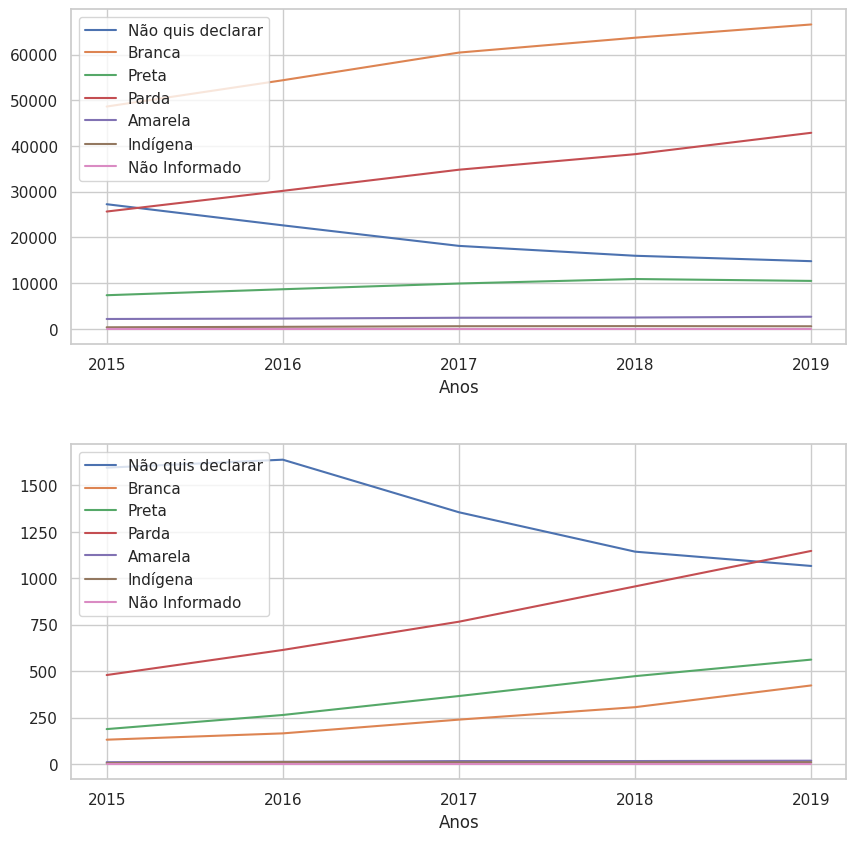

In [ ]:
#plot_def_br_cor_raca, plot_def_ba_cor_raca = get_vetor_line_chart(df_aluno_tic_ba, df_aluno_tic_br, 'TP_COR_RACA', ['Didn\'t want to declare', 'White','Black','Brown','Yellow','Indigenous','No information'],False)

plot_def_br_cor_raca, plot_def_ba_cor_raca = get_vetor_line_chart(df_aluno_tic_ba, df_aluno_tic_br, 'TP_COR_RACA',
            ['Não quis declarar', 'Branca','Preta','Parda','Amarela','Indígena','Não Informado'],False)

#Plots
f, axes = plt.subplots(2, figsize=(10, 10))
f.subplots_adjust(hspace=.3, wspace=.25)
# y_ticks = [x for x in range(10, 33, 2)]
x_ticks = [2015, 2016, 2017, 2018, 2019]

plot_def_br_cor_raca.plot.line(x='Anos', xticks=x_ticks,
    #title='Crescimento de estudantes de IES públicas por cor e raça no Brasil',
    ax=axes[0])

plot_def_ba_cor_raca.plot.line(x='Anos', ax=axes[1], xticks=x_ticks
    #,title='Crescimento de estudantes de IES públicas por cor e raça na Bahia'
    )



# **DEFICÊNCIA**

## **Montar colunas:**

IN_DEFICIENCIA_VISUAL = IN_DEFICIENCIA_BAIXA_VISAO + IN_DEFICIENCIA_CEGUEIRA;

IN_DEFICIENCIA_AUDITIVA = IN_DEFICIENCIA_AUDITIVA + IN_DEFICIENCIA_SURDEZ;

IN_SINDROME_ESPECTRO_AUTISTA = IN_TGD_AUTISMO + IN_TGD_SINDROME_ASPERGER;

In [ ]:
# Eliminando valores NaN nas colunas a serem unidas #
df_aluno_tic_ba['IN_DEFICIENCIA_BAIXA_VISAO'] = df_aluno_tic_ba['IN_DEFICIENCIA_BAIXA_VISAO'].fillna(0.0)
df_aluno_tic_ba['IN_DEFICIENCIA_CEGUEIRA'] = df_aluno_tic_ba['IN_DEFICIENCIA_CEGUEIRA'].fillna(0.0)
df_aluno_tic_ba['IN_DEFICIENCIA_AUDITIVA'] = df_aluno_tic_ba['IN_DEFICIENCIA_AUDITIVA'].fillna(0.0)
df_aluno_tic_ba['IN_DEFICIENCIA_SURDEZ'] = df_aluno_tic_ba['IN_DEFICIENCIA_SURDEZ'].fillna(0.0)
df_aluno_tic_ba['IN_TGD_AUTISMO'] = df_aluno_tic_ba['IN_TGD_AUTISMO'].fillna(0.0)
df_aluno_tic_ba['IN_TGD_SINDROME_ASPERGER'] = df_aluno_tic_ba['IN_TGD_SINDROME_ASPERGER'].fillna(0.0)

In [ ]:
# Unindo as colunas conforme convencionado com o grupo #
df_aluno_tic_ba['IN_DEFICIENCIA_VISUAL'] = df_aluno_tic_ba['IN_DEFICIENCIA_BAIXA_VISAO'] + df_aluno_tic_ba['IN_DEFICIENCIA_CEGUEIRA']
df_aluno_tic_ba['IN_DEFICIENCIA_AUDITIVA'] = df_aluno_tic_ba['IN_DEFICIENCIA_AUDITIVA'] + df_aluno_tic_ba['IN_DEFICIENCIA_SURDEZ']
df_aluno_tic_ba['IN_TRANSTORNO_ESPECTRO_AUTISTA'] = df_aluno_tic_ba['IN_TGD_AUTISMO'] + df_aluno_tic_ba['IN_TGD_SINDROME_ASPERGER']

In [ ]:
# Identifiquei que para a coluna IN_DEFICIENCIA_AUDITIVA, após a união, ficou com alguns campos com número 2.0 (ou seja, a pessoa constava tanto em Deficiência Auditiva quanto
#  em surdez) e dessa forma preferi transformar esses casos para o valor 1.0, para manter o padrão
print("Antes da Alteração")
print(df_aluno_tic_ba[['IN_DEFICIENCIA_AUDITIVA', 'ID_ALUNO']].groupby(['IN_DEFICIENCIA_AUDITIVA']).count())
df_aluno_tic_ba['IN_DEFICIENCIA_AUDITIVA'] = np.where(df_aluno_tic_ba['IN_DEFICIENCIA_AUDITIVA'] >= 1., 1., 0.)
print("Depois da Alteração")
print(df_aluno_tic_ba[['IN_DEFICIENCIA_AUDITIVA', 'ID_ALUNO']].groupby(['IN_DEFICIENCIA_AUDITIVA']).count())

Antes da Alteração
                         ID_ALUNO
IN_DEFICIENCIA_AUDITIVA          
0.0                         18376
1.0                            38
Depois da Alteração
                         ID_ALUNO
IN_DEFICIENCIA_AUDITIVA          
0.0                         18376
1.0                            38


### **CRIANDO COLUNA SOMA_DEFICIENCIA**
CRIANDO COLUNA SOMA_DEFICIENCIA PARA PODER CALCULAR A PORCENTAGEM DE FORMA CORRETA, POIS IDENTIFIQUEI QUE POR CONTA DE PODER EXISTIR PESSOAS EM MAIS DE UMA CATEGORIA, O TOTAL DE PESSOAL NA COLUNA IN_DEFICENCIA NÃO FICA IGUAL À SOMA DAS PESSOAS DAS COLUNAS DAS CATEGORIAS DE DEFICIÊNCIA (ESSA ÚLTIMA É SEMPRE MAIOR)

In [ ]:
# Eliminando valores NaN nas demais colunas de tipos de deficiência para que possa criar uma coluna com a informação correta de todas as pessoas com Deficiência, pois não está
# coincidindo os valores da coluna IN_DEFICIENCIA com a soma das colunas de tipos de deficiência
df_aluno_tic_ba['IN_DEFICIENCIA_FISICA'] = df_aluno_tic_ba['IN_DEFICIENCIA_FISICA'].fillna(0.0)
df_aluno_tic_ba['IN_DEFICIENCIA_INTELECTUAL'] = df_aluno_tic_ba['IN_DEFICIENCIA_INTELECTUAL'].fillna(0.0)
df_aluno_tic_ba['IN_DEFICIENCIA_MULTIPLA'] = df_aluno_tic_ba['IN_DEFICIENCIA_MULTIPLA'].fillna(0.0)
df_aluno_tic_ba['IN_DEFICIENCIA_SUPERDOTACAO'] = df_aluno_tic_ba['IN_DEFICIENCIA_SUPERDOTACAO'].fillna(0.0)

# Criando a coluna SOMA_DEFICIENCIA
df_aluno_tic_ba['SOMA_DEFICIENCIA'] = df_aluno_tic_ba['IN_DEFICIENCIA_AUDITIVA'] + df_aluno_tic_ba['IN_DEFICIENCIA_FISICA'] + df_aluno_tic_ba['IN_DEFICIENCIA_VISUAL'] + df_aluno_tic_ba['IN_TRANSTORNO_ESPECTRO_AUTISTA'] + df_aluno_tic_ba['IN_DEFICIENCIA_INTELECTUAL'] + df_aluno_tic_ba['IN_DEFICIENCIA_MULTIPLA'] + df_aluno_tic_ba['IN_DEFICIENCIA_SUPERDOTACAO']

# Transformando somas maiores que 1.0 em 1.0 para manter o padrão
#df_aluno_tic_ba['SOMA_DEFICIENCIA'] = np.where(df_aluno_tic_ba['SOMA_DEFICIENCIA'] >= 1., 1., 0.)

print(df_aluno_tic_ba[['NU_ANO_CENSO', 'SOMA_DEFICIENCIA']].groupby(['NU_ANO_CENSO']).sum())
#print(df_aluno_tic_ba[['NU_ANO_CENSO', 'IN_DEFICIENCIA']].groupby(['NU_ANO_CENSO']).sum())
print(df_aluno_tic_ba.loc[df_aluno_tic_ba['IN_DEFICIENCIA'] == 1][['NU_ANO_CENSO', 'IN_DEFICIENCIA']].groupby(['NU_ANO_CENSO']).sum())

print(df_aluno_tic_ba[['IN_DEFICIENCIA', 'ID_ALUNO']].groupby(['IN_DEFICIENCIA']).count())

              SOMA_DEFICIENCIA
NU_ANO_CENSO                  
2015                      25.0
2016                      24.0
2017                      24.0
2018                      33.0
2019                      49.0
              IN_DEFICIENCIA
NU_ANO_CENSO                
2015                    25.0
2016                    23.0
2017                    23.0
2018                    31.0
2019                    43.0
                ID_ALUNO
IN_DEFICIENCIA          
0.0                14343
1.0                  145
9.0                 3926


In [ ]:
df_aluno_tic_ba.loc[df_aluno_tic_ba.IN_DEFICIENCIA == 1][['NU_ANO_CENSO', 'SG_IES', 'IN_DEFICIENCIA']].groupby(['NU_ANO_CENSO', 'SG_IES']).count()

IN_DEFICIENCIA
NU_ANO_CENSO SG_IES                  
2015         IFBA                   8
             IFBAIANO               7
             UESB                   2
             UFBA                   7
             UNEB                   1
2016         IFBA                   4
             IFBAIANO               7
             UESB                   2
             UESC                   1
             UFBA                   7
             UNEB                   2
2017         IFBA                   7
             IFBAIANO               3
             UESB                   2
             UESC                   1
             UFBA                   7
             UNEB                   3
2018         IFBA                  13
             IFBAIANO               4
             UESB                   4
             UESC                   1
             UFBA                   7
             UNEB                   2
2019         IFBA                  14
             IFBAIANO               7
             UEFS                   2
             UESB                   7
             UESC                   3
             UFBA                   7
             UNEB                   3

In [ ]:
def construcao_data_frame(colunas, texto_categoria):
    universidades, anos, categoria, valor, qt_abs, media = [], [], [], [], [], []
    for uni in df_aluno_tic_ba.SG_IES.unique():
        for ano in range(2015, 2020):
            df_uni = df_aluno_tic_ba.loc[(df_aluno_tic_ba.SG_IES == uni) & (df_aluno_tic_ba.NU_ANO_CENSO == ano)]
            for i in range(len(colunas)):
                anos.append(ano)
                universidades.append(uni)
                df_uni_cat = df_uni.loc[df_uni[colunas[i]] == 1]
                valor.append(colunas[i])
                categoria.append(texto_categoria)
                valor_abs = df_uni_cat.groupby([colunas[i]]).size().values.tolist()
                if len(valor_abs) > 0:
                    qt_abs.append(sum(valor_abs))
                    total = df_uni.groupby(['NU_ANO_CENSO']).size().values.tolist()
                    media.append((100*sum(valor_abs)/sum(total)))
                else:
                    qt_abs.append(0)
                    media.append(0)

                # for j in range(len(valores[i])):
                #     if colunas[i] == 'NU_IDADE':
                #         if j-1 == -1:
                #             valor.append(f'até {valores[i][j]} anos')
                #             print(0,valores[i][j] )
                #             df_uni_cat = df_uni.loc[(df_uni[colunas[i]] >= 0) & (df_uni[colunas[i]] < valores[i][j])]
                #             print(df_uni_cat.groupby([colunas[i]]).size().values)
                #         else:
                #             print(valores[i][j-1],valores[i][j] )
                #             valor.append(f'{valores[i][j-1]} - {valores[i][j]-1} anos')
                #             df_uni_cat = df_uni.loc[(df_uni[colunas[i]] >= valores[i][j-1]) & (df_uni[colunas[i]] < valores[i][j])]
                #             print(df_uni_cat.groupby([colunas[i]]).size().values)
                #     else:
                #         valor.append(valores[i][j])
                #         df_uni_cat = df_uni.loc[df_uni[colunas[i]] == valores[i][j]]
                #         print('---- não é idade -----')
                #         print(df_uni_cat.groupby([colunas[i]]).size().values)

                #     valor_abs = df_uni_cat.groupby([colunas[i]]).size().values.tolist()

                #     universidades.append(uni)
                #     anos.append(ano)
                #     categoria.append(colunas[i])

                #     if len(valor_abs) > 0:
                #         qt_abs.append(sum(valor_abs))

                #         total = df_uni.groupby(['NU_ANO_CENSO']).size().values.tolist()
                #         # print(total)
                #         print(valor_abs, sum(valor_abs))
                #         media.append((100*sum(valor_abs)/sum(total)))
                #     else:
                #         qt_abs.append(0)
                #         media.append(0)

    return pd.DataFrame({'universidade':universidades, 'ano':anos,
                                     'categoria':categoria, 'valor': valor,
                                     'qt_abs':qt_abs, 'media':media})

In [ ]:
colunas = ['IN_DEFICIENCIA_AUDITIVA', 'IN_DEFICIENCIA_FISICA',
'IN_DEFICIENCIA_INTELECTUAL', 'IN_DEFICIENCIA_CEGUEIRA']

In [ ]:
df_aluno_tic_ba.loc[(df_aluno_tic_ba.NU_ANO_CENSO == 2015) & (df_aluno_tic_ba.IN_DEFICIENCIA == 1)]['IN_DEFICIENCIA'].count()

25

In [ ]:
deficiencias = [
 #   'IN_DEFICIENCIA',
'IN_DEFICIENCIA_AUDITIVA',
'IN_DEFICIENCIA_FISICA',
'IN_DEFICIENCIA_INTELECTUAL',
'IN_DEFICIENCIA_MULTIPLA',
#'IN_DEFICIENCIA_SURDEZ',
#'IN_DEFICIENCIA_SURDOCEGUEIRA',
#'IN_DEFICIENCIA_BAIXA_VISAO',
#'IN_DEFICIENCIA_CEGUEIRA',
'IN_DEFICIENCIA_VISUAL',
'IN_DEFICIENCIA_SUPERDOTACAO',
'IN_TRANSTORNO_ESPECTRO_AUTISTA',
#'IN_TGD_AUTISMO',
#'IN_TGD_SINDROME_ASPERGER',
#'IN_TGD_SINDROME_RETT',
#'IN_TGD_TRANSTOR_DESINTEGRATIVO'
]

In [ ]:
replace_deficiencias = {
    'IN_DEFICIENCIA_AUDITIVA': 'DEFICIENCIA AUDITIVA',
    'IN_DEFICIENCIA_FISICA': 'DEFICIENCIA FISICA',
    'IN_DEFICIENCIA_INTELECTUAL': 'DEFICIENCIA INTELECTUAL',
    'IN_DEFICIENCIA_MULTIPLA': 'DEFICIENCIA MULTIPLA',
    'IN_DEFICIENCIA_VISUAL': 'DEFICIENCIA VISUAL',
    'IN_DEFICIENCIA_SUPERDOTACAO': 'SUPERDOTACAO',
    'IN_TRANSTORNO_ESPECTRO_AUTISTA': 'TRANSTORNO ESPECTRO AUTISTA'
}

In [ ]:
deficiencias = [
'DEFICIENCIA AUDITIVA',
'DEFICIENCIA FISICA',
'DEFICIENCIA INTELECTUAL',
'DEFICIENCIA MULTIPLA',
'DEFICIENCIA VISUAL',
'SUPERDOTACAO',
'TRANSTORNO ESPECTRO AUTISTA'
]
deficiencias2 = [
'DEFICIÊNCIA AUDITIVA',
'DEFICIÊNCIA FÍSICA',
'DEFICIÊNCIA INTELECTUAL',
'DEFICIÊNCIA MÚLTIPLA',
'DEFICIÊNCIA VISUAL',
'SUPERDOTACAO',
'TRANSTORNO ESPECTRO AUTISTA'
]

In [ ]:
df_aluno_tic_ba = df_aluno_tic_ba.rename(replace_deficiencias, axis = 1)
df_aluno_tic_br = df_aluno_tic_br.rename(replace_deficiencias, axis = 1)

In [ ]:
def get_vetor_categorias(data, column, coluns, categoria, percentagem = True, crescimento_percentual = False):
    new_group = []
    crescimentoPercentual = []
    somatorio = []
    result = []
    x_primeiro_ano = 0
    for i in range(2015, 2020):
        #somatorio.append(data.loc[(data.NU_ANO_CENSO == i)][categoria].count())
        somatorio.append(data.loc[data.NU_ANO_CENSO == i][categoria].sum())
        #somatorio.append(data.loc[(data.NU_ANO_CENSO == i) & (data[categoria] == 1)][categoria].count())
        x = data.loc[(data[column] == 1) & (data['NU_ANO_CENSO'] == i)][column].count()

        #x_primeiro_ano = data.loc[(data[column] == categoria) & (data['NU_ANO_CENSO'] == 2015)][column].value_counts().sum()
        if i == 2015:
            x_primeiro_ano = x
            crescimentoPercentual.append(0)
        else:
            if x_primeiro_ano == 0:
                x_primeiro_ano = x
                crescimentoPercentual.append(0)
            else:
                crescimentoPercentual.append((x/x_primeiro_ano)*100)

        new_group.append(x)

        print("ano: " + str(i) + ", quantidade: " + str(x), ", somatório: " + str(somatorio[len(somatorio)-1]), str(column), str(categoria))

    for i in range(0, len(new_group)):
        result.append((new_group[i]/somatorio[i])*100)
        print(result[i], new_group[i], somatorio[i])

    if percentagem:
        print(result)
        return result

    if crescimento_percentual:
        print(crescimentoPercentual)
        return crescimentoPercentual

    return new_group

def get_vetor_line_chart(data_ba:pd.DataFrame, data_brasil:pd.DataFrame, coluns, categoria, percentagem = True, crescimento_percentual = False):
    df_brasil = data_brasil.loc[(data_brasil.NU_ANO_CENSO >= 2015) &
                (data_brasil.TP_CATEGORIA_ADMINISTRATIVA.isin([1, 2, 3])) &
                (data_brasil.TP_MODALIDADE_ENSINO == 1)
                ]
    dict_categoria_ba = {}
    dict_categoria_br = {}

    for column_name in coluns:
        dict_categoria_ba[column_name] = get_vetor_categorias(data_ba, column_name, coluns, categoria, percentagem, crescimento_percentual)
        # print(dict_categoria_ba[categoria] )
        #dict_categoria_br[categoria] = get_vetor_categorias_r(df_brasil.replace(replace_categoria), column_name, categoria, percentagem, crescimento_percentual)

    dict_categoria_ba['Anos'] = [x for x in range(2015, 2020)]
    #dict_categoria_br['Anos'] = [x for x in range(2015, 2020)]
    print()
    # print(dict_categoria_ba, dict_categoria_br)
    plot_def_ba = pd.DataFrame(dict_categoria_ba)
    #plot_def_br_cor_raca = pd.DataFrame(dict_categoria_br)

    print('dados BA')
    display(plot_def_ba)
    # print('cor e raça no brasil')
    # display(plot_def_br_cor_raca)
    return plot_def_ba #plot_def_br_cor_raca

ano: 2015, quantidade: 11 , somatório: 25.0 DEFICIENCIA AUDITIVA SOMA_DEFICIENCIA
ano: 2016, quantidade: 8 , somatório: 24.0 DEFICIENCIA AUDITIVA SOMA_DEFICIENCIA
ano: 2017, quantidade: 6 , somatório: 24.0 DEFICIENCIA AUDITIVA SOMA_DEFICIENCIA
ano: 2018, quantidade: 6 , somatório: 33.0 DEFICIENCIA AUDITIVA SOMA_DEFICIENCIA
ano: 2019, quantidade: 7 , somatório: 49.0 DEFICIENCIA AUDITIVA SOMA_DEFICIENCIA
44.0 11 25.0
33.33333333333333 8 24.0
25.0 6 24.0
18.181818181818183 6 33.0
14.285714285714285 7 49.0
[44.0, 33.33333333333333, 25.0, 18.181818181818183, 14.285714285714285]
ano: 2015, quantidade: 7 , somatório: 25.0 DEFICIENCIA FISICA SOMA_DEFICIENCIA
ano: 2016, quantidade: 4 , somatório: 24.0 DEFICIENCIA FISICA SOMA_DEFICIENCIA
ano: 2017, quantidade: 6 , somatório: 24.0 DEFICIENCIA FISICA SOMA_DEFICIENCIA
ano: 2018, quantidade: 9 , somatório: 33.0 DEFICIENCIA FISICA SOMA_DEFICIENCIA
ano: 2019, quantidade: 13 , somatório: 49.0 DEFICIENCIA FISICA SOMA_DEFICIENCIA
28.000000000000004 7 25.

,DEFICIENCIA AUDITIVA,DEFICIENCIA FISICA,DEFICIENCIA INTELECTUAL,DEFICIENCIA MULTIPLA,DEFICIENCIA VISUAL,SUPERDOTACAO,TRANSTORNO ESPECTRO AUTISTA,Anos
0,44.000000,28.000000,4.000000,0.000000,24.000000,0.000000,0.000000,2015
1,33.333333,16.666667,12.500000,0.000000,33.333333,4.166667,0.000000,2016
2,25.000000,25.000000,12.500000,0.000000,33.333333,4.166667,0.000000,2017
3,18.181818,27.272727,9.090909,0.000000,39.393939,3.030303,3.030303,2018
4,14.285714,26.530612,8.163265,4.081633,42.857143,2.040816,2.040816,2019


Text(0.5, 0, 'Ano')

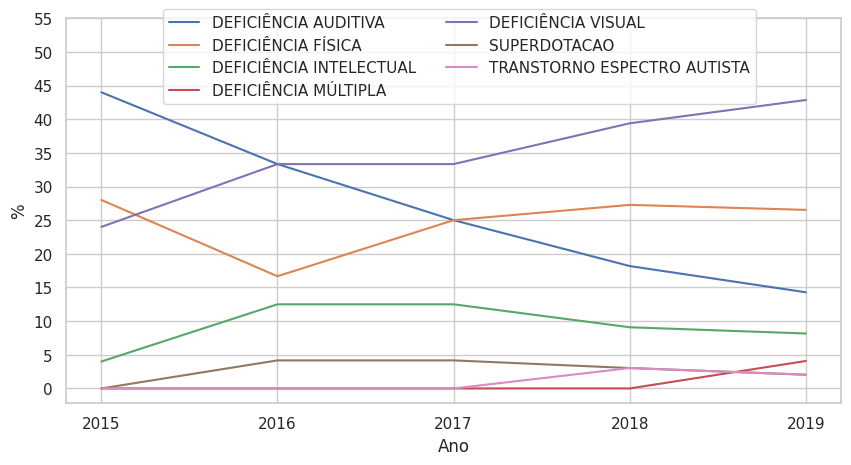

In [ ]:
#plot_def_br_cor_raca,
plot_def_ba = get_vetor_line_chart(df_aluno_tic_ba, df_aluno_tic_br, deficiencias,
            'SOMA_DEFICIENCIA', True, True)
# plot_def_br_cor_raca, plot_def_ba_cor_raca = get_vetor_line_chart(clsc_presencial, df, 'TP_COR_RACA',
#             ['Didn\'t want to declare', 'White','Black','Brown','Yellow','Indigenous','No information'],True)
#Plots
f, axes = plt.subplots(1, figsize=(10, 5))
f.subplots_adjust(hspace=.3, wspace=.25)
y_ticks = [x for x in range(0, 60, 5)]
#y_ticks = [x for x in range(0, 2)]
#y_ticks = [x for x in range(0, 33, 2)]
#y_ticks = [x for x in range(0, 350, 25)]
#y_ticks = [x for x in range(0, 610, 100)]
x_ticks = [2015, 2016, 2017, 2018, 2019]
plot_def_ba.plot.line(x='Anos', xticks=x_ticks, yticks=y_ticks,ylabel='%',
#    title='Crescimento de estudantes de IES públicas por cor e raça no Brasil',
    # title='Growth of students from public higher education institutions by color and race in Brazil',
    ax=axes)
#axes[1].legend(labels=['White','Yellow','Brown','Black','Didn\'t declare','Indigenous'])
#axes.legend(labels=deficiencias)
axes.legend(labels=deficiencias2, loc="center right", bbox_to_anchor=(0.9, 0.9), ncol=2)
axes.set_xlabel('Ano')

#plot_def_br_cor_raca.plot.line(x='Anos', ax=axes[1], xticks=x_ticks, yticks=y_ticks,ylabel='%',
    #title='Crescimento de estudantes de IES públicas por cor e raça na Bahia'
    # title='Growth of students from public higher education institutions by color and race in Bahia')
#axes[1].legend(labels=['White','Yellow','Brown','Black','Didn\'t declare','Indigenous'])
# axes[1].legend(labels=deficiencias)
# axes[1].set_xlabel('Ano')

In [ ]:
df_def = df_aluno_tic_br.loc[(df_aluno_tic_br.IN_DEFICIENCIA == 1) &
                (df_aluno_tic_br.NU_ANO_CENSO >= 2015) &
                (df_aluno_tic_br.TP_CATEGORIA_ADMINISTRATIVA.isin([1, 2, 3])) &
                (df_aluno_tic_br.TP_MODALIDADE_ENSINO == 1)]
df_no_def = df_aluno_tic_br.loc[(df_aluno_tic_br.IN_DEFICIENCIA == 0) &
                (df_aluno_tic_br.NU_ANO_CENSO >= 2015) &
                (df_aluno_tic_br.TP_CATEGORIA_ADMINISTRATIVA.isin([1, 2, 3])) &
                (df_aluno_tic_br.TP_MODALIDADE_ENSINO == 1)]
new_group = df_def.groupby(['NU_ANO_CENSO'])[deficiencias].value_counts()
no_def_group = df_no_def.groupby(['NU_ANO_CENSO'])[deficiencias].value_counts()

indexes = list(zip(*new_group.index))
print('valores para deficiência')
print(new_group.values*100/sum(new_group.values))

indexes_2 = list(zip(*no_def_group.index))
print('valores sem deficiência')
print(no_def_group.values*100/sum(no_def_group.values))

plot_def_brasil_def_unique = pd.DataFrame({'Anos':indexes[0],
                         'Com deficiência':new_group.values*100/sum(new_group.values),
                         'Sem deficiência':no_def_group.values*100/sum(no_def_group.values) })

valores para deficiência
[21.04878761 15.80484955 17.17791411 21.01957347 24.94887526]
valores sem deficiência
[18.11304119 18.78080094 20.45553682 20.91153769 21.73908336]


In [ ]:
df_def.groupby(['NU_ANO_CENSO'])[deficiencias].value_counts()

NU_ANO_CENSO  IN_DEFICIENCIA_AUDITIVA  IN_DEFICIENCIA_FISICA  IN_DEFICIENCIA_INTELECTUAL  IN_DEFICIENCIA_MULTIPLA  IN_DEFICIENCIA_SURDEZ  IN_DEFICIENCIA_BAIXA_VISAO  IN_DEFICIENCIA_CEGUEIRA  IN_DEFICIENCIA_SUPERDOTACAO  IN_TGD_AUTISMO  IN_TGD_SINDROME_RETT
2015          1.0                      0.0                    0.0                         0.0                      0.0                    0.0                         0.0                      0.0                          0.0             0.0                     11
              0.0                      1.0                    0.0                         0.0                      0.0                    0.0                         0.0                      0.0                          0.0             0.0                      7
                                       0.0                    0.0                         0.0                      0.0                    0.0                         1.0                      0.0                       

In [ ]:
df_def = df_aluno_tic_ba.loc[(df_aluno_tic_ba.IN_DEFICIENCIA == 1)]
df_no_def = df_aluno_tic_ba.loc[(df_aluno_tic_ba.IN_DEFICIENCIA == 0)]
total = []
new_group = df_def.groupby(['NU_ANO_CENSO'])['IN_DEFICIENCIA'].value_counts()
no_def_group = df_no_def.groupby(['NU_ANO_CENSO'])['IN_DEFICIENCIA'].value_counts()

for i in range(2015, 2020):
  total.append(df_aluno_tic_ba.loc[(df_aluno_tic_ba.NU_ANO_CENSO == i)]['IN_DEFICIENCIA'].count())

indexes = list(zip(*new_group.index))
print('valores para deficiência')
#print(new_group.values*100/sum(new_group.values))
print(new_group.values*100/total)
print(indexes[0])

indexes_2 = list(zip(*no_def_group.index))
print('valores sem deficiência')
#print(no_def_group.values*100/sum(no_def_group.values))
print(no_def_group.values*100/total)

# plot_def_ba_def_unique = pd.DataFrame({'Anos':indexes[0],
#                          'Com deficiência':new_group.values*100/sum(new_group.values),
#                          'Sem deficiência':no_def_group.values*100/sum(no_def_group.values) })
plot_def_ba_def_unique = pd.DataFrame({'Anos':indexes[0],
                         'Com deficiência':new_group.values*100/total,
                         #'Sem deficiência':no_def_group.values*100/total
                                       })

valores para deficiência
[0.78369906 0.65303805 0.63100137 0.80310881 1.02454134]
(2015, 2016, 2017, 2018, 2019)
valores sem deficiência
[80.37617555 75.24134015 75.52812071 77.56476684 80.58136764]


In [ ]:
df_aluno_tic_ba.loc[(df_aluno_tic_ba.NU_ANO_CENSO == 2015)]['IN_DEFICIENCIA'].count()

3190

In [ ]:
df_def.groupby(['NU_ANO_CENSO'])['IN_DEFICIENCIA'].value_counts()
df_aluno_tic_ba.groupby(['NU_ANO_CENSO'])['IN_DEFICIENCIA'].count()

NU_ANO_CENSO
2015    3190
2016    3522
2017    3645
2018    3860
2019    4197
Name: IN_DEFICIENCIA, dtype: int64

<Axes: xlabel='Anos', ylabel='%'>

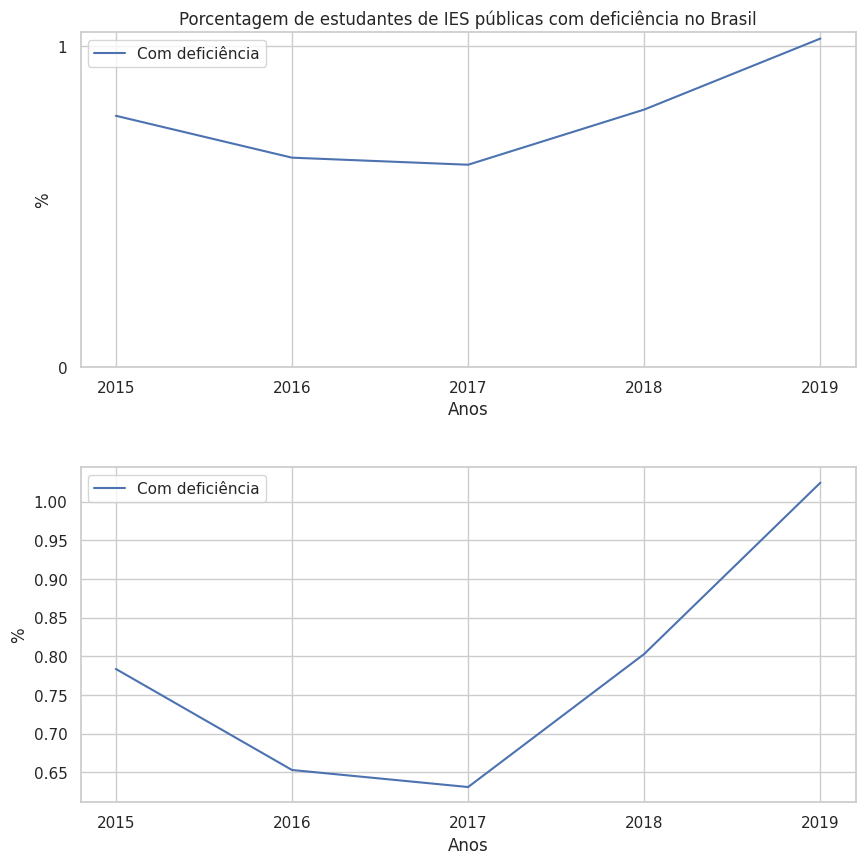

In [ ]:
from matplotlib.pyplot import xticks, yticks

f, axes = plt.subplots(2, figsize=(10, 10))
f.subplots_adjust(hspace=.3, wspace=.25)

plot_def_ba_def_unique.plot.line(x='Anos', xticks=[2015, 2016, 2017, 2018, 2019], ylabel='%', yticks=[x for x in range(0, 2, 1)]
    ,title='Porcentagem de estudantes de IES públicas com deficiência no Brasil', ax=axes[0])

plot_def_ba_def_unique.plot.line(x='Anos', ax=axes[1], xticks=[2015, 2016, 2017, 2018, 2019], ylabel='%',
    #title='Porcentagem de estudantes de IES públicas com deficiência na Bahia'
    )

In [ ]:
replace_nacionalidade = {
    'TP_NACIONALIDADE':{
        1: 'Brasileiro',
        2: 'Naturalizado',
        3: 'Estrangeiro'
    }
}

In [ ]:
df_aluno_tic_ba[['ID_ALUNO', 'TP_NACIONALIDADE']].groupby(['TP_NACIONALIDADE']).count()

,ID_ALUNO
TP_NACIONALIDADE,
1.0,18336
2.0,59
3.0,19
